## Build Baseline Model
## Train a Logistic Regression model as an interpretable baseline
## Evaluate using AUC-PR, F1-Score, and Confusion Matrix

In [1]:
import sys
import os
import pandas as pd

# Add the src directory to the path to import modules
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from modelling import FraudModel

# Initialize the model class
fraud_model = FraudModel()

# Load the processed data
# Note: Ensure these files exist from the previous feature engineering step
X_train_path = '../data/processed/Fraud_Data_X_train_resampled.csv'
y_train_path = '../data/processed/Fraud_Data_y_train_resampled.csv'
X_test_path = '../data/processed/Fraud_Data_X_test.csv'
y_test_path = '../data/processed/Fraud_Data_y_test.csv'

X_train, y_train = fraud_model.load_data(X_train_path, y_train_path)
X_test, y_test = fraud_model.load_data(X_test_path, y_test_path)

# Check if data loaded correctly
if X_train is not None:
    print("Ready for training.")
else:
    print("Please run the feature engineering notebook first to generate the data.")

Data loaded successfully. X shape: (219136, 15), y shape: (219136,)
Data loaded successfully. X shape: (30223, 15), y shape: (30223,)
Ready for training.


In [2]:
# Train Logistic Regression
# We use max_iter=1000 to ensure convergence
model = fraud_model.train_logistic_regression(X_train, y_train, max_iter=1000, random_state=42)


--- Training Logistic Regression ---
Model training completed.
Model training completed.


# Evaluate model performance on train set



--- Model Evaluation ---



--- Model Evaluation ---


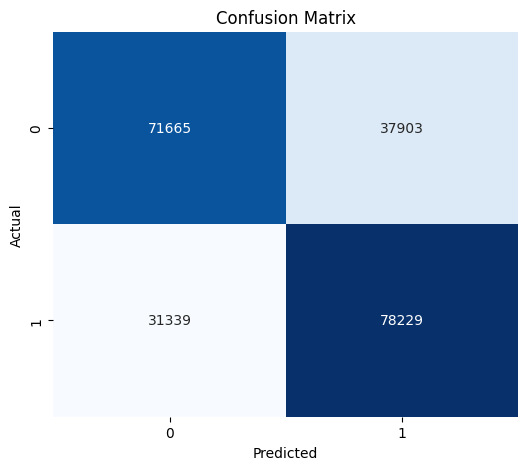


--- Model Evaluation ---


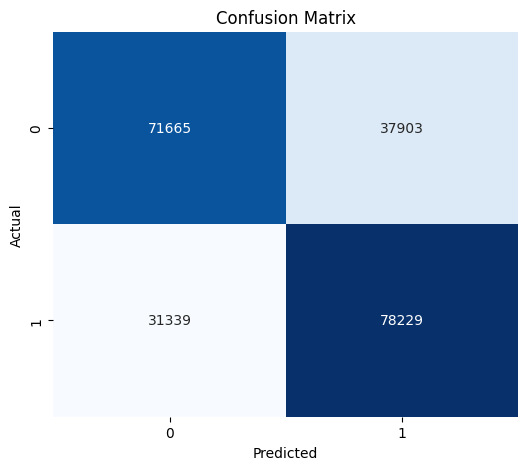


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67    109568
           1       0.67      0.71      0.69    109568

    accuracy                           0.68    219136
   macro avg       0.68      0.68      0.68    219136
weighted avg       0.68      0.68      0.68    219136

ROC-AUC Score: 0.7609
AUC-PR Score: 0.7938



--- Model Evaluation ---


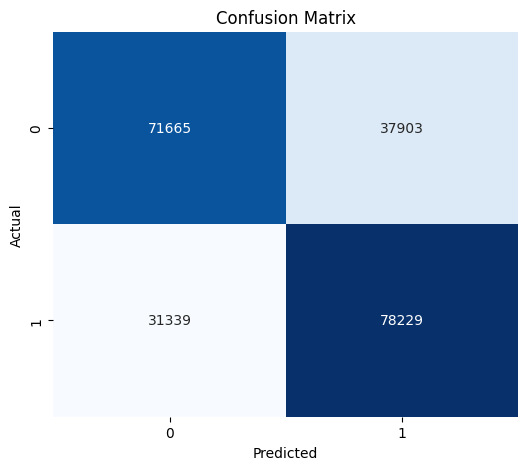


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67    109568
           1       0.67      0.71      0.69    109568

    accuracy                           0.68    219136
   macro avg       0.68      0.68      0.68    219136
weighted avg       0.68      0.68      0.68    219136

ROC-AUC Score: 0.7609
AUC-PR Score: 0.7938


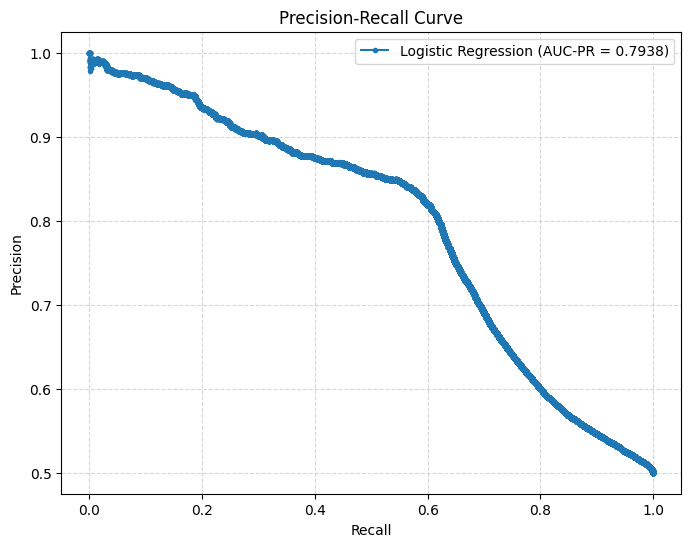

In [3]:
train_metrics = fraud_model.evaluate_model(X_train, y_train)

### 📊 Training Set Interpretation (Balanced Data)

**1. Performance Overview:**
*   **Accuracy (68%):** The model is correct about 68% of the time.
*   **AUC-PR (0.79):** This is a decent score, indicating the model has some predictive power, but it's not perfect.

**2. Underfitting Check:**
*   **Diagnosis: Underfitting.**
*   **Why?** Even on the training data (which the model has "studied"), the scores are relatively low (Recall 0.71, Precision 0.67). A powerful model usually scores 0.90+ on training data.
*   **Reason:** Logistic Regression is a linear model. Fraud patterns are likely complex and non-linear, so the model struggles to draw a clean straight line to separate fraud from non-fraud.

**3. Business Impact (The "Lens"):**
*   **Security (Recall = 0.71):**
    *   The model detects **71%** of fraud cases.
    *   **Risk:** It misses **29%** (31,339 cases). This is a moderate security risk.
*   **Customer Experience (Precision = 0.67):**
    *   When the model flags a transaction, it is correct **67%** of the time.
    *   **Friction:** It incorrectly flagged **37,903** legitimate transactions (False Positives). This is a high volume of blocked customers.

**Conclusion:**
The baseline model is struggling to separate the classes effectively. We likely need more complex features or a more powerful model (like Random Forest or XGBoost) to improve both security and customer experience.

# Evaluate model performance on test set


--- Model Evaluation ---


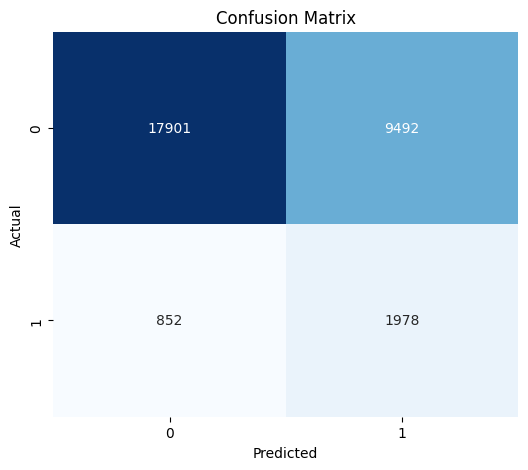


--- Model Evaluation ---


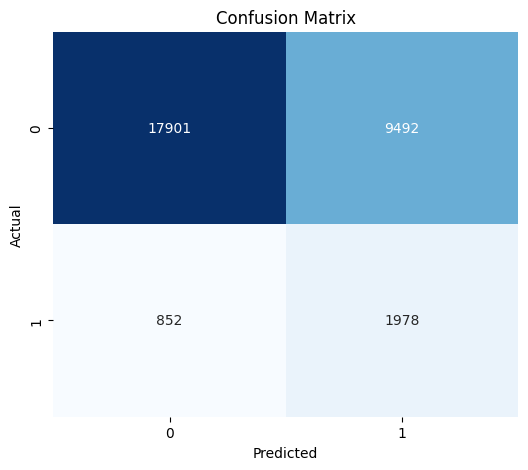


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.65      0.78     27393
           1       0.17      0.70      0.28      2830

    accuracy                           0.66     30223
   macro avg       0.56      0.68      0.53     30223
weighted avg       0.88      0.66      0.73     30223

ROC-AUC Score: 0.7375
AUC-PR Score: 0.3643


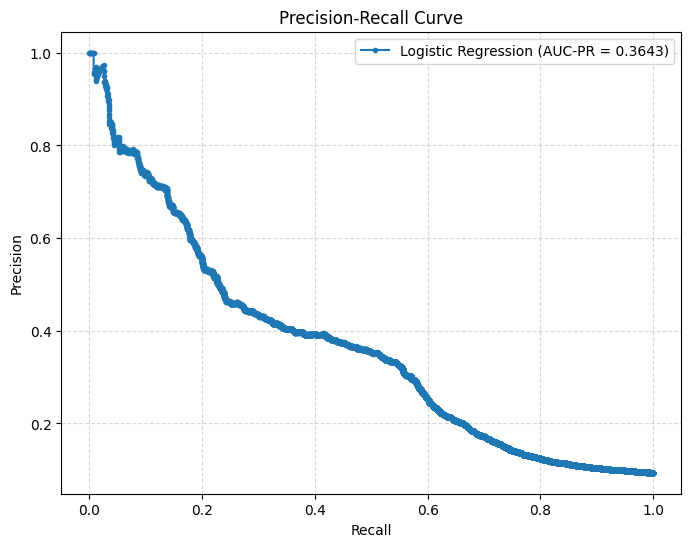

In [4]:
# Evaluate the model
metrics = fraud_model.evaluate_model(X_test, y_test)

### 📉 Test Set Interpretation (Real-World Imbalanced Data)

**1. Performance Overview:**
*   **Accuracy (66%):** Similar to training, but misleading on imbalanced data.
*   **AUC-PR (0.36):** This is low. It reflects the difficulty of finding the "needle in the haystack" without generating too many false alarms.

**2. Overfitting vs. Generalization:**
*   **Recall Consistency:** Train Recall (0.71) vs Test Recall (0.70). The model **generalizes well** in terms of its ability to find fraud. It didn't just memorize the training data.
*   **Precision Drop:** Train Precision (0.67) -> Test Precision (0.17). This huge drop is expected when moving from a balanced training set (50% fraud) to a real-world imbalanced test set (~9% fraud). The model is "trigger happy."

**3. Business Impact (The "Lens"):**

*   **Security Perspective (Recall = 0.70):**
    *   **Status:** Acceptable Baseline.
    *   **Impact:** We catch **70%** of actual fraud attempts (1,978 cases).
    *   **Risk:** We miss **30%** (852 cases). These are direct financial losses.

*   **Customer Experience Perspective (Precision = 0.17):**
    *   **Status:** 🚨 **Critical Issue.**
    *   **Impact:** Precision of **17%** means for every 100 transactions we block, **83 are legitimate customers**.
    *   **The Cost:** We blocked **9,492** innocent transactions (False Positives). This leads to card declines, customer churn, and support calls.

**4. Final Verdict on Baseline:**
*   **The Good:** SMOTE successfully taught the model to find fraud (70% recall is much better than 0%).
*   **The Bad:** The model is too aggressive. It can't distinguish "weird but legal" from "fraud" well enough, leading to poor precision.
*   **Next Steps:** We need **Non-Linear Models** (Random Forest, Gradient Boosting). These models can create more complex boundaries to reduce those 9,492 False Positives while keeping the Recall high.